#BIG_MART_SALES

This dataframe typically includes various attributes related to items sold in a retail store, along with details about the stores themselves.

1. **Item_Identifier**: A unique identifier for each item in the store. This could be a SKU (Stock Keeping Unit) code or another form of unique ID.

2. **Item_Weight**: The weight of the item. This is important for both inventory management and sales analysis.

3. **Item_Fat_Content**: The category of fat content for the item. Common values might include 'Low Fat', 'Regular', and sometimes other variations or misspellings.

4. **Item_Visibility**: The percentage of total display area allocated to this particular item in the store. This is a measure of how prominently an item is displayed to customers.

5. **Item_Type**: A broad category for the type of item. Examples might include 'Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', etc.

6. **Item_MRP**: The Maximum Retail Price (MRP) of the item. This is the highest price that can be charged for the item.

7. **Outlet_Identifier**: A unique identifier for each store (outlet). This helps in distinguishing sales and inventory data across different locations.

8. **Outlet_Establishment_Year**: The year in which the outlet was established. This can be useful for understanding the store's age and possibly its market maturity.

9. **Outlet_Size**: The size of the outlet. Common categories might include 'Small', 'Medium', and 'High'.

10. **Outlet_Location_Type**: The type of city in which the outlet is located. Examples might be 'Tier 1', 'Tier 2', 'Tier 3', etc., indicating the size and economic development of the city.

11. **Outlet_Type**: The type of the outlet. This could be 'Supermarket Type1', 'Supermarket Type2', 'Grocery Store', etc.

12. **Item_Outlet_Sales**: The sales of the particular item in the particular outlet. This is the target variable that we often try to predict in sales analysis.

#Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, skew, kurtosis
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings

#Read Dataset

In [3]:
!gdown 18i0RYTIBI6Tafd5LH-EiGxlfr1mcfbpU

Downloading...
From: https://drive.google.com/uc?id=18i0RYTIBI6Tafd5LH-EiGxlfr1mcfbpU
To: /content/bigmart.csv
100% 870k/870k [00:00<00:00, 118MB/s]


In [4]:
data = pd.read_csv('bigmart.csv')

In [5]:
df = data.copy()

#Interpreting with dataset

In [6]:
df.shape

(8523, 12)

In [7]:
df.size

102276

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
pd.set_option('display.precision', 3)

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.50,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
3,FDX07,19.20,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380
4,NCD19,8.93,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000,8523.000,8523.000,8523.000,8523.000
mean,12.858,0.066,140.993,1997.832,2181.289
std,4.643,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,8.774,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.850,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


In [13]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [14]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df.isna().sum().sum()

3873

#Null Handling

**total null values** = 3873\
The number of null values compare to whole dataset is too large.\
**'Item_Weight'**, is numeric, so we fill its null values with **mean + std** to help the distribution of the column and nor causing bimodal distribution.\
**'Outlet_Size'**, is object, so we fill its null values with the mode of the columns.


In [16]:
mean = df['Item_Weight'].mean()
std = df['Item_Weight'].std()
n_missing = df['Item_Weight'].isnull().sum()

random_values = np.random.normal(loc=mean, scale=std, size=n_missing)
df.loc[df['Item_Weight'].isna(), 'Item_Weight'] = random_values

In [17]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [18]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Duplicated values Handling:


In [19]:
df.duplicated().sum()

0

####Our dataset has no duplicated values

#Dive in Categorical Columns

####First of all, let's drop identifer columns since they don't have predictive effect on our target.

In [20]:
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], axis=1)
df.shape

(8523, 10)

In [21]:
cat_cols = [col for col in df.select_dtypes(include='object').columns]
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [22]:
for col in cat_cols:
  print('Columns Name:')
  print(df[col].value_counts())
  print('\n----------------')

Columns Name:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

----------------
Columns Name:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

----------------
Columns Name:
Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

----------------
Columns Name:
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

----------------
Columns Name:
Outlet_Type
Supermarket Type1    5577
Grocer

In [23]:
df = df.replace({'Item_Fat_Content':{'low fat': 'Low Fat','LF': 'Low Fat','reg': 'Regular','regular': 'Regular'}})
df.shape

(8523, 10)

In [24]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#Mean, Trim_Mean, Skew, Kurtosis

In [25]:
num_columns = df.select_dtypes(include=['number']).columns

In [26]:
# Calculate mean and trimmed mean for each numeric columns
mean_vs_trimmed_mean = pd.DataFrame({'mean': df[num_columns].mean(),
                                     'trimmed_mean': df[num_columns].apply(lambda x: trim_mean(x, proportiontocut=0.1))})

# Calculate kurtosis and skewness for each numeric columns
kurtosis_skewness = pd.DataFrame({'kurtosis': df[num_columns].apply(kurtosis),
                                  'skewness': df[num_columns].apply(skew)})

print("Mean vs Trimmed Mean:")
print(mean_vs_trimmed_mean)

print("\nKurtosis and Skewness:")
print(kurtosis_skewness)

Mean vs Trimmed Mean:
                               mean  trimmed_mean
Item_Weight                  12.844        12.796
Item_Visibility               0.066         0.060
Item_MRP                    140.993       139.700
Outlet_Establishment_Year  1997.832      1998.040
Item_Outlet_Sales          2181.289      1971.327

Kurtosis and Skewness:
                           kurtosis  skewness
Item_Weight                  -1.051     0.061
Item_Visibility               1.678     1.167
Item_MRP                     -0.890     0.127
Outlet_Establishment_Year    -1.206    -0.397
Item_Outlet_Sales             1.614     1.177


Based on the result, 'Item_Visibility' and 'Item_Outlet_Sales' columns are moderately skewed.



#Check for Outlier

##Box Plot

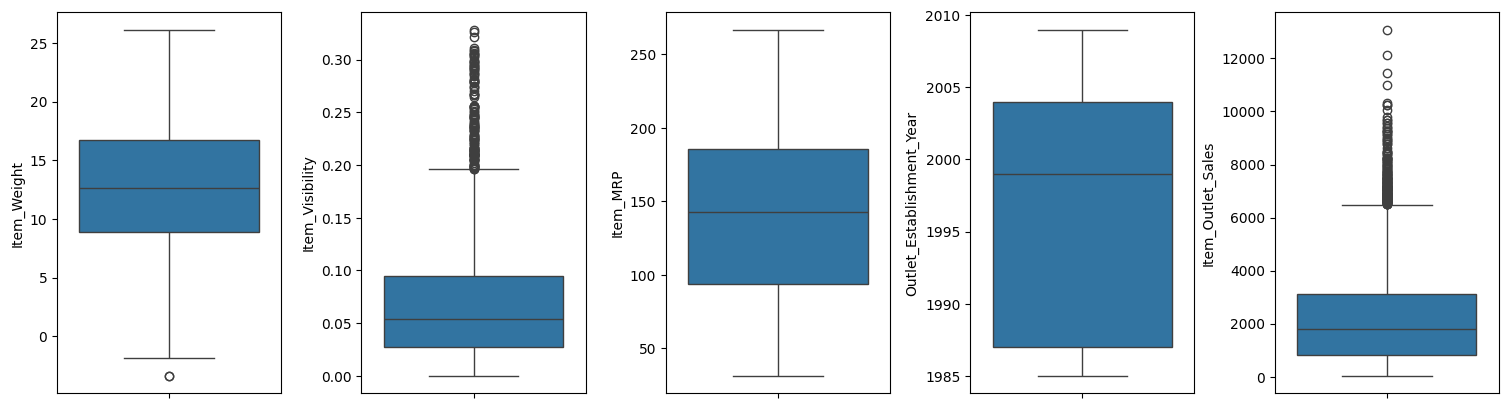

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15,4))
index = 0
axs = axs.flatten()
for column in num_columns:
  sns.boxplot(y=column, data=df, ax = axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [28]:
for c, v in df[num_columns].items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(df)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns Item_Weight outliers = 0.02%
columns Item_Visibility outliers = 1.69%
columns Item_MRP outliers = 0.00%
columns Outlet_Establishment_Year outliers = 0.00%
columns Item_Outlet_Sales outliers = 2.18%


Based on the result, 'Item_Outlet_Sales' columns has higher outlier than the other's. But it's not significant.

#Visualization

##Categorical Columns

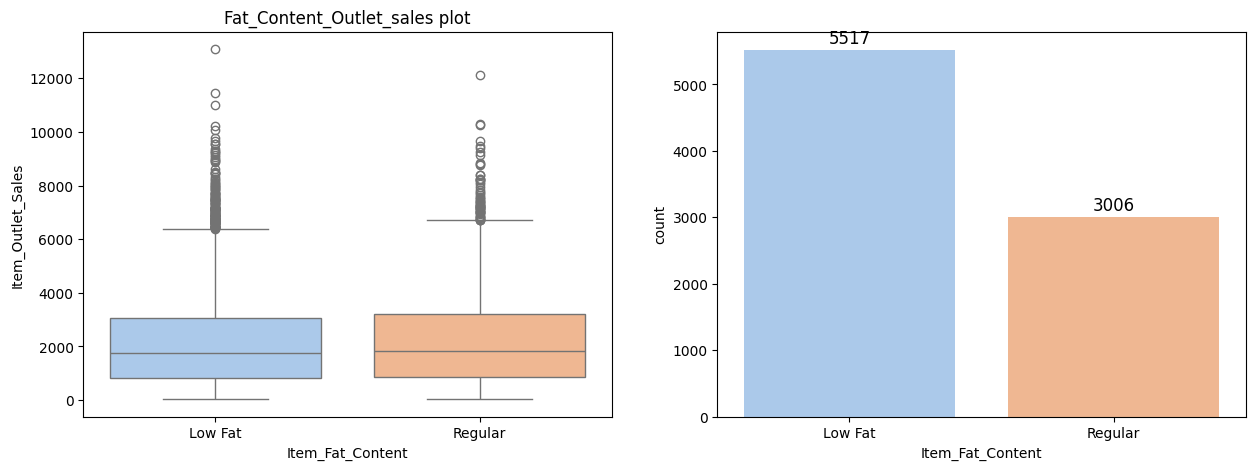

In [29]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Fat_Content_Outlet_sales plot')
#sns.violinplot(x='Item_Fat_Content',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Fat_Content_Outlet_sales plot')
ax = sns.countplot(x='Item_Fat_Content', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

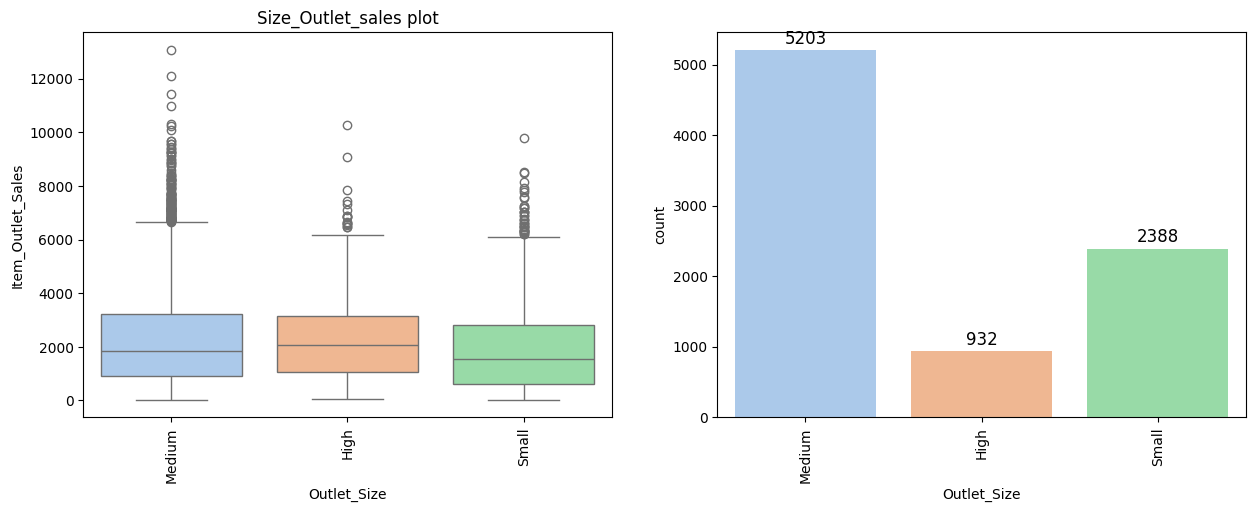

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Size_Outlet_sales plot')
#sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Size_Outlet_sales plot')
ax = sns.countplot(x='Outlet_Size', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.setp(axes[0].get_xticklabels(), rotation=90)
plt.setp(axes[1].get_xticklabels(), rotation=90)
plt.show()

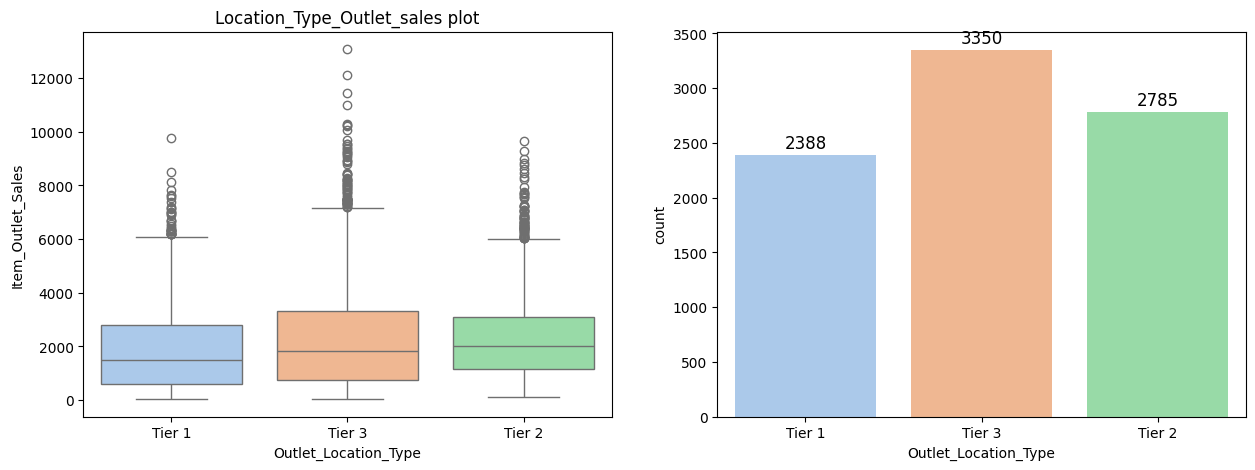

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Location_Type_Outlet_sales plot')
#sns.violinplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Location_Type_Outlet_sales plot')
ax = sns.countplot(x='Outlet_Location_Type', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

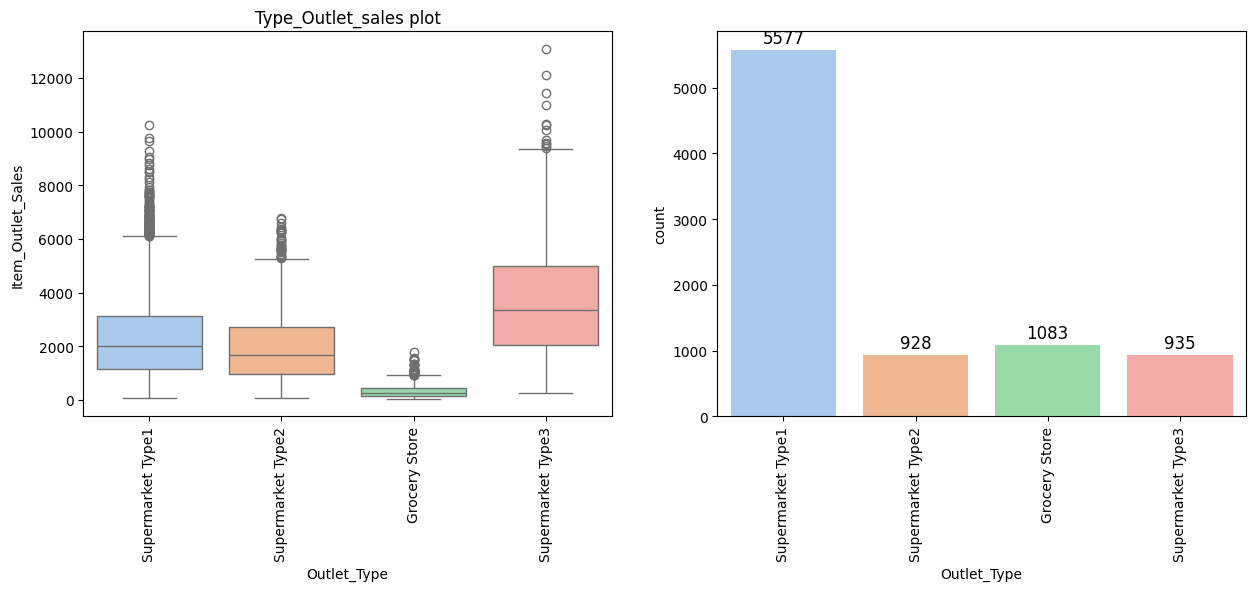

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Type_Outlet_sales plot')
#sns.violinplot(x='Outlet_Type',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Type_Outlet_sales plot')
ax = sns.countplot(x='Outlet_Type', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.setp(axes[0].get_xticklabels(), rotation=90)
plt.setp(axes[1].get_xticklabels(), rotation=90)
plt.show()

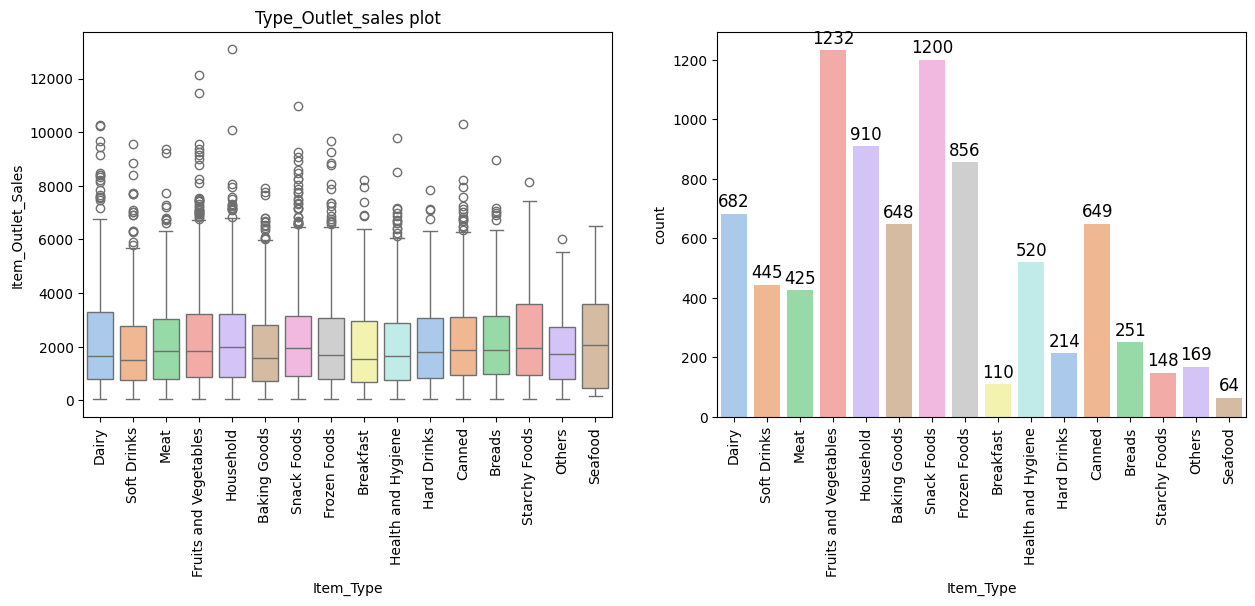

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
palette = sns.color_palette('pastel')
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data = df, ax = axes[0], palette = palette).set_title('Type_Outlet_sales plot')
#sns.violinplot(x='Item_Type',y='Item_Outlet_Sales', data = df, ax= axes[1],palette = palette).set_title('Type_Outlet_sales plot')
ax = sns.countplot(x='Item_Type', data = df, palette=palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.setp(axes[0].get_xticklabels(), rotation=90)
plt.setp(axes[1].get_xticklabels(), rotation=90)
plt.show()

##Numerical Columns

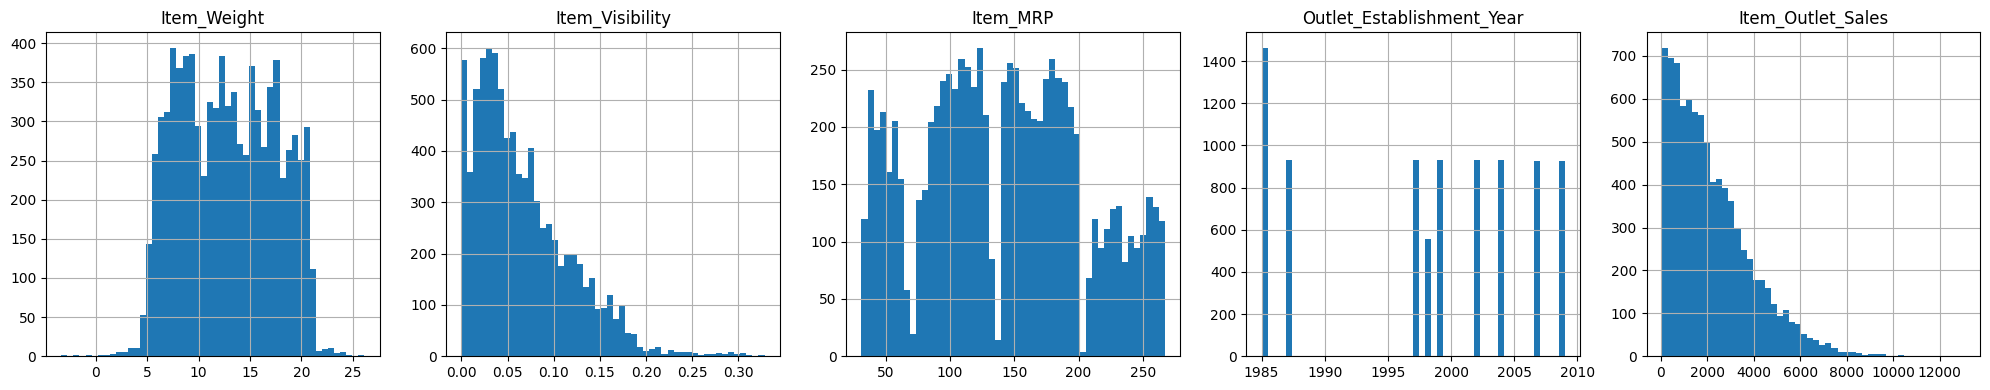

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for ax, col in zip(axes, num_columns):
    df[col].hist(bins=50, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

#Label Encoder

Since the number of unique values in 'Item_Type' was 16, I prefered to use **label encoder** in this column and  **get_dummies** for the other categorical columns.

In [35]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dtype=float)

In [36]:
le = LabelEncoder()

le.fit(df['Item_Type'].unique())
df['Item_Type'] = le.transform(df['Item_Type'])
print(df['Item_Type'].unique())

[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]


Remove redundant columns which is created by get_dummies method.

In [37]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [38]:
df = df.drop(columns=['Item_Fat_Content_Regular','Outlet_Size_Small','Outlet_Location_Type_Tier 3','Outlet_Type_Grocery Store'],axis=1)
df.shape

(8523, 14)

In [39]:
df.sample(5)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1091,14.850,0.010,13,157.463,1987,2503.408,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8282,15.261,0.053,5,59.590,1985,1640.531,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4037,17.700,0.043,5,163.221,2007,1794.331,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3281,20.250,0.026,9,180.098,2004,3440.854,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2236,9.000,0.080,3,78.364,2002,1728.417,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


#Correlation & Heatmap

In [40]:
corr_matrix = df.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales                1.000
Item_MRP                         0.568
Outlet_Type_Supermarket Type3    0.311
Outlet_Type_Supermarket Type1    0.109
Outlet_Size_Medium               0.075
Outlet_Location_Type_Tier 2      0.058
Outlet_Size_High                 0.024
Item_Type                        0.017
Item_Weight                      0.016
Item_Fat_Content_Low Fat        -0.019
Outlet_Type_Supermarket Type2   -0.038
Outlet_Establishment_Year       -0.049
Outlet_Location_Type_Tier 1     -0.111
Item_Visibility                 -0.129
Name: Item_Outlet_Sales, dtype: float64

In [41]:
corr_matrix = df.corr().abs()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales                1.000
Item_MRP                         0.568
Outlet_Type_Supermarket Type3    0.311
Item_Visibility                  0.129
Outlet_Location_Type_Tier 1      0.111
Outlet_Type_Supermarket Type1    0.109
Outlet_Size_Medium               0.075
Outlet_Location_Type_Tier 2      0.058
Outlet_Establishment_Year        0.049
Outlet_Type_Supermarket Type2    0.038
Outlet_Size_High                 0.024
Item_Fat_Content_Low Fat         0.019
Item_Type                        0.017
Item_Weight                      0.016
Name: Item_Outlet_Sales, dtype: float64

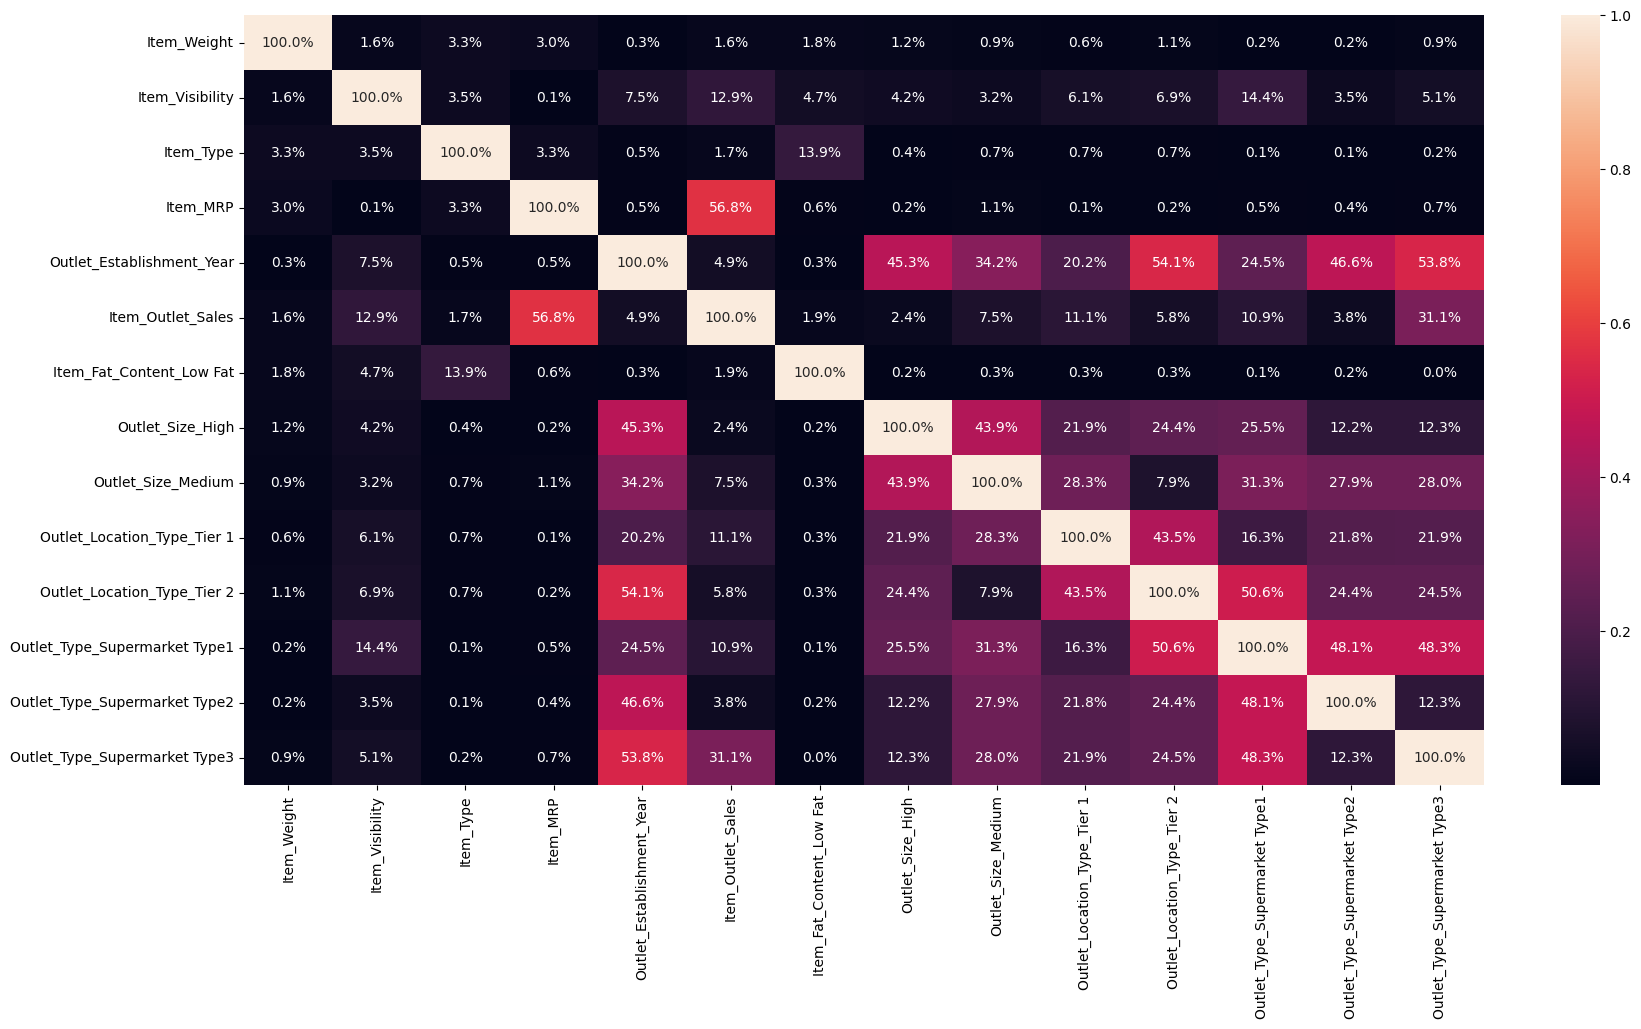

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True, fmt= '.1%');

In [43]:
print('The highest correlation between feautures:\n')

for x in range(len(df.columns)):
  corr_matrix.iloc[x,x] = 0.0
corr_matrix.abs().idxmax()

The highest correlation between feautures:



Item_Weight                                          Item_Type
Item_Visibility                  Outlet_Type_Supermarket Type1
Item_Type                             Item_Fat_Content_Low Fat
Item_MRP                                     Item_Outlet_Sales
Outlet_Establishment_Year          Outlet_Location_Type_Tier 2
Item_Outlet_Sales                                     Item_MRP
Item_Fat_Content_Low Fat                             Item_Type
Outlet_Size_High                     Outlet_Establishment_Year
Outlet_Size_Medium                            Outlet_Size_High
Outlet_Location_Type_Tier 1        Outlet_Location_Type_Tier 2
Outlet_Location_Type_Tier 2          Outlet_Establishment_Year
Outlet_Type_Supermarket Type1      Outlet_Location_Type_Tier 2
Outlet_Type_Supermarket Type2    Outlet_Type_Supermarket Type1
Outlet_Type_Supermarket Type3        Outlet_Establishment_Year
dtype: object

#Train_Test_Split

In [44]:
target_variable = 'Item_Outlet_Sales'
new_order = [col for col in df if col != target_variable] + [target_variable]
df = df[new_order]

In [45]:
df.sample(5)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
6155,14.85,0.020,4,262.591,1997,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4996.829
870,6.75,0.108,4,95.675,1987,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,958.752
3523,16.70,0.000,6,109.191,2009,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,545.956
6880,14.00,0.105,5,143.281,2004,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3277.068
6798,14.30,0.109,6,88.286,1998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,175.771


In [46]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6818, 13), (6818,), (1705, 13), (1705,))

In [48]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

#Feature Importance

Item_MRP                         0.495
Outlet_Type_Supermarket Type3    0.144
Outlet_Type_Supermarket Type1    0.129
Item_Visibility                  0.055
Item_Weight                      0.050
Outlet_Establishment_Year        0.048
Outlet_Type_Supermarket Type2    0.044
Item_Type                        0.024
Item_Fat_Content_Low Fat         0.005
Outlet_Location_Type_Tier 1      0.002
Outlet_Size_Medium               0.002
Outlet_Size_High                 0.001
Outlet_Location_Type_Tier 2      0.001
dtype: float64


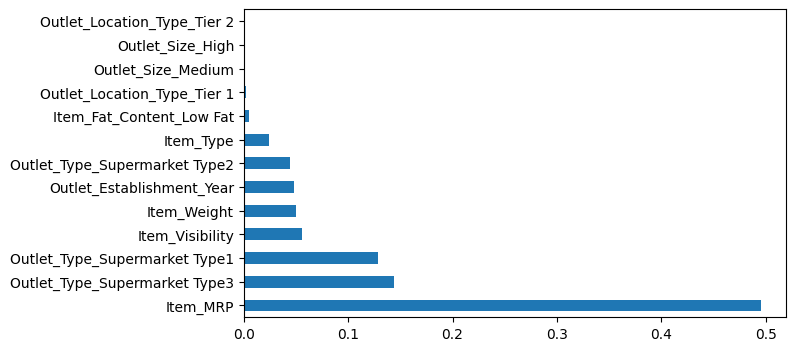

In [50]:
column_names = [col for col in df if col != target_variable]
X_train_df = pd.DataFrame(X_train, columns=column_names)

rf = RandomForestRegressor(max_depth=10)
rf.fit(X_train_df, y_train)

plt.figure(figsize=(7,4))
feature_importance = pd.Series(rf.feature_importances_, index=X_train_df.columns)
feature_importance.nlargest(len(X_train_df.columns)).plot(kind='barh')
print(feature_importance.sort_values(ascending=False))

#Model Evaluation

#SGDRegressor

In [51]:
sgdreg = SGDRegressor()
sgdreg.fit(X_train_poly, y_train)

SGDRegressor()

In [52]:
y_pred = sgdreg.predict(X_test_poly)

In [53]:
rmse_SGD = mean_squared_error(y_test, y_pred, squared=False)
print(rmse_SGD)

1029.001282323897


In [54]:
r2_SGD = r2_score(y_test, y_pred)
print(r2_SGD)

0.6104285135331704


#LinearRegression + Cross Validation

In [55]:
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print(scores)

[0.57054397 0.55536265 0.54799689 0.56564874 0.56540217]


In [56]:
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression()

In [57]:
y_hat = regressor.predict(X_test_poly)

In [58]:
r2_linear = r2_score(y_test, y_hat)
print(r2_linear)

0.6191673870127348


In [59]:
rmse_linear = mean_squared_error(y_test, y_hat, squared=False)
print(rmse_linear)

1017.3945362988821


#Ridge

In [60]:
lridge = Ridge()
lridge.fit(X_train_poly, y_train)

Ridge()

In [61]:
y_hat_ridge = lridge.predict(X_test_poly)
r2_ridge = r2_score(y_test, y_hat_ridge)
print(r2_ridge)

0.6188814987457094


In [62]:
rmse_ridge = mean_squared_error(y_test, y_hat_ridge, squared=False)
print(rmse_ridge)

1017.7763399897788


#Lasso

In [63]:
lasso = Lasso()
lasso.fit(X_train_poly, y_train)

Lasso()

In [64]:
y_hat_lasso = lasso.predict(X_test_poly)
r2_lasso = r2_score(y_test, y_hat_lasso)
print(r2_lasso)

0.6208254272969952


In [65]:
rmse_lasso = mean_squared_error(y_test, y_hat_lasso, squared=False)
print(rmse_lasso)

1015.1773926900428


#KNeighborsRegressor + GridSearch

In [66]:

knn_grid = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(2,11)}

reg = GridSearchCV(knn_grid, param_grid, cv=5)
reg.fit(X_train_poly, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [67]:
print(reg.best_params_, reg.best_score_)

{'n_neighbors': 10} 0.5533418206095836


In [68]:
knn = KNeighborsRegressor(n_neighbors=10, algorithm='kd_tree')
knn.fit(X_train_poly, y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10)

In [69]:
y_hat_knn = knn.predict(X_test_poly)
r2_knn = r2_score(y_test, y_hat_knn)
print(r2_knn)

0.5713424173987092


In [70]:
rmse_knn = mean_squared_error(y_test, y_hat_knn, squared=False)
print(rmse_knn)

1079.3880110222615


#Final Result

In [71]:
result = pd.DataFrame({'Model': ['SGDRegressor', 'LinearRegressor', 'Ridge', 'Lasso', 'KNregressor'],
                       'R2_Score' : [r2_SGD, r2_linear, r2_ridge, r2_lasso, r2_knn],
                       'RMSE': [rmse_SGD, rmse_linear, rmse_ridge, rmse_lasso, rmse_knn]})
result

,Model,R2_Score,RMSE
0,SGDRegressor,0.610,1029.001
1,LinearRegressor,0.619,1017.395
2,Ridge,0.619,1017.776
3,Lasso,0.621,1015.177
4,KNregressor,0.571,1079.388


#Interpretation & insight



In this project, we tackled several challenges, from cleaning the dataset, including handling null values and categorical features, to evaluating various models to determine which one performed best on our data.

The data cleaning process had its difficulties, such as deciding which columns to drop and determining the best method to fill the numerous null values.

After completing these steps, our final analysis, presented in the last section of the notebook, showed that the Lasso model achieved the highest accuracy of 0.62, outperforming the other models.